<a href="https://colab.research.google.com/github/dattali18/machine_learning_msc_project/blob/research/daniel/notebook/part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Dataset

## Context

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

## Content
Attribute Information:

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

## Data Pre-Processing

In [1]:
DATA_PATH = "https://github.com/dattali18/machine_learning_msc_project/blob/main/db/heart.csv?raw=true"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
heart_data = pd.read_csv(DATA_PATH)

In [5]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
heart_data.shape

(1025, 14)

In [9]:
list(heart_data.columns)

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

## Preprae the data

1. Split the data into X, y
2. Split the data into 80%, 10%, 10% (train, test, split)



In [10]:
from sklearn.model_selection import train_test_split

In [12]:
X = heart_data.drop('target', axis=1)
y = heart_data['target']

In [13]:
X.shape, y.shape

((1025, 13), (1025,))

In [15]:
# split the data into 80%, 10%, 10% train, test, validation
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)

In [17]:
X_train.shape, y_train.shape

((820, 13), (820,))

In [18]:
X_test.shape, y_test.shape

((102, 13), (102,))

In [19]:
X_val.shape, y_val.shape

((103, 13), (103,))

## Train models

### Tree based models

### Basic Tree with Random Splitter

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
model1 = DecisionTreeClassifier(splitter='random')
model1.fit(X_train, y_train)

DecisionTreeClassifier(splitter='random')

In [22]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

In [23]:
# evalulate model1
def evaluate_model(y_true, y_pred):
    return {
        'accuracy' : accuracy_score(y_true, y_pred),
        'precision' : precision_score(y_true, y_pred),
        'recall' : recall_score(y_true, y_pred),
        'f1' : f1_score(y_true, y_pred)
    }

In [26]:
y_pred = model1.predict(X_test)
scores = evaluate_model(y_test, y_pred)
print(scores)

{'accuracy': 0.9901960784313726, 'precision': 1.0, 'recall': 0.98, 'f1': 0.98989898989899}


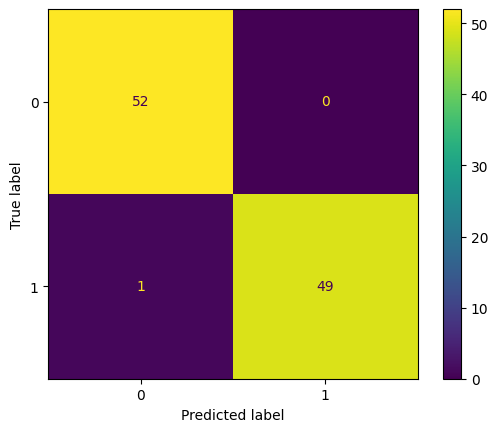

In [27]:
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
display.plot()
plt.show()

In [28]:
# test the model on all the data
y_pred = model1.predict(X)
scores = evaluate_model(y, y_pred)
print(scores)

{'accuracy': 0.9970731707317073, 'precision': 1.0, 'recall': 0.9942965779467681, 'f1': 0.9971401334604385}


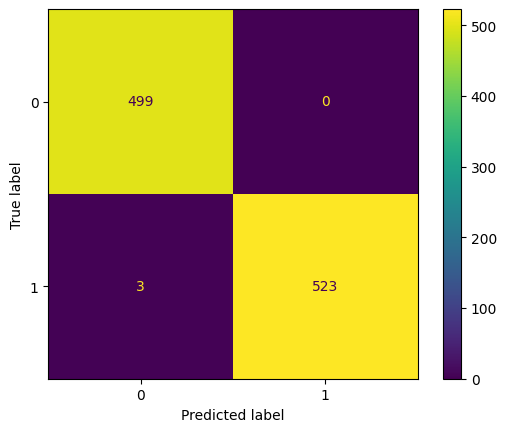

In [30]:
cm = confusion_matrix(y, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
display.plot()
plt.show()

### Decision Tree with Best splitter

In [31]:
model2 = DecisionTreeClassifier(splitter='best')
model2.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
y_pred = model2.predict(X_test)
scores = evaluate_model(y_test, y_pred)
print(scores)

{'accuracy': 0.9901960784313726, 'precision': 1.0, 'recall': 0.98, 'f1': 0.98989898989899}


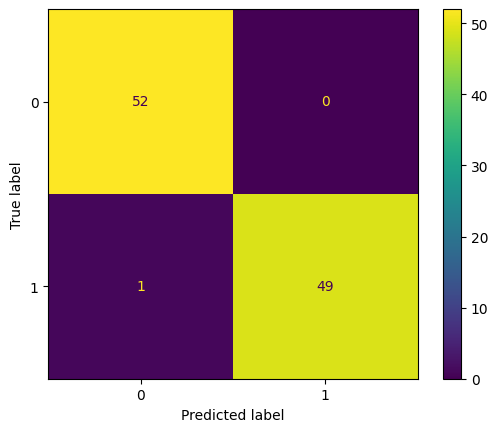

In [33]:
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
display.plot()
plt.show()

In [34]:
y_pred = model2.predict(X)
scores = evaluate_model(y, y_pred)
print(scores)

{'accuracy': 0.9970731707317073, 'precision': 1.0, 'recall': 0.9942965779467681, 'f1': 0.9971401334604385}


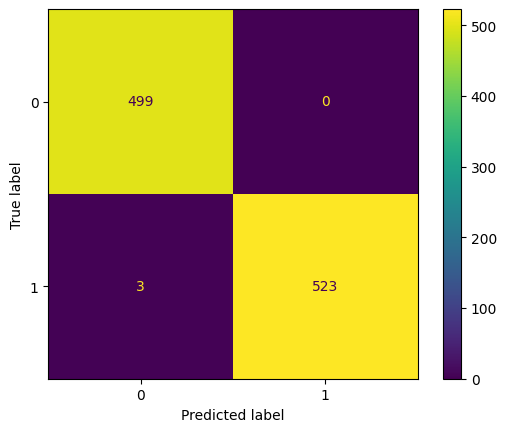

In [36]:
cm = confusion_matrix(y, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model2.classes_)
display.plot()
plt.show()

### Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
model3 = RandomForestClassifier(random_state=42)
model3.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
y_pred = model3.predict(X_test)
scores = evaluate_model(y_test, y_pred)
print(scores)

{'accuracy': 0.9901960784313726, 'precision': 1.0, 'recall': 0.98, 'f1': 0.98989898989899}


In [45]:
y_prev = None
for max_depth in range(2, 32):
    model = RandomForestClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if y_prev is not None:
        if (y_pred - y_prev).sum() == 0:
            break
    print(f"RandomForestClassifier(max_depth={max_depth})")
    print(evaluate_model(y_test, y_pred))
    print()
    y_prev = y_pred

RandomForestClassifier(max_depth=2)
{'accuracy': 0.8333333333333334, 'precision': 0.7704918032786885, 'recall': 0.94, 'f1': 0.8468468468468469}

RandomForestClassifier(max_depth=3)
{'accuracy': 0.803921568627451, 'precision': 0.734375, 'recall': 0.94, 'f1': 0.8245614035087719}

RandomForestClassifier(max_depth=4)
{'accuracy': 0.8333333333333334, 'precision': 0.7619047619047619, 'recall': 0.96, 'f1': 0.8495575221238938}

RandomForestClassifier(max_depth=5)
{'accuracy': 0.8529411764705882, 'precision': 0.7868852459016393, 'recall': 0.96, 'f1': 0.8648648648648649}

RandomForestClassifier(max_depth=6)
{'accuracy': 0.8921568627450981, 'precision': 0.8421052631578947, 'recall': 0.96, 'f1': 0.897196261682243}

RandomForestClassifier(max_depth=7)
{'accuracy': 0.9215686274509803, 'precision': 0.875, 'recall': 0.98, 'f1': 0.9245283018867925}

RandomForestClassifier(max_depth=8)
{'accuracy': 0.9901960784313726, 'precision': 1.0, 'recall': 0.98, 'f1': 0.98989898989899}

